# Traffic Situation 


In [123]:
import warnings
warnings.filterwarnings('ignore')

## les conditions de circulation


#### 1 : Import

In [145]:
import pandas as pd

df_traffic = pd.read_csv('./data/Traffic.csv')
df_traffic.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,1:00:00 AM,1,Wednesday,13,2,1.0,26,42,normal
1,1:00:00 PM,1,Wednesday,40,9,5.0,20,74,normal
2,1:15:00 AM,1,Wednesday,15,3,NaN,32,50,normal
3,1:15:00 PM,1,Wednesday,64,19,22.0,12,117,normal
4,1:30:00 AM,1,Wednesday,15,0,1.0,13,29,normal


#### 2 : Doublons

In [146]:
# y a t il des doublons
dupliques = df_traffic.duplicated() # renvoie true or false pour chaque observation

nb_doublons = dupliques.sum()

print(f'Le nombre de doublons est égal à {nb_doublons}')

# Il n' y a donc pas de doublons

Le nombre de doublons est égal à 0


#### 3 : La variable du nombre de voiture (`CarCount`) : 



In [147]:
# principaux indicateurs avec describe()

df_traffic['CarCount'].describe()


count    2976.000000
mean       69.508065
std        58.007290
min         0.000000
25%        19.000000
50%        64.000000
75%       107.000000
max      1460.000000
Name: CarCount, dtype: float64

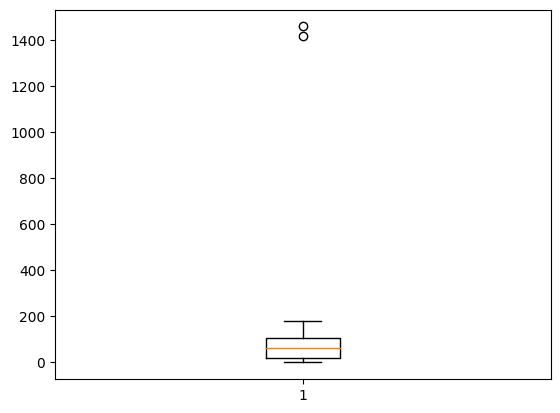

In [148]:
# Traçage du graphique boxplot
import matplotlib.pyplot as plt
plt.boxplot(df_traffic['CarCount'])
plt.show()

# Nous constatons la présence de valeurs aberrantes : deux valeurs très au dela du 3 ème quartile au regard de l'intervalle interquartile

In [149]:
# identification et affichage des valeurs aberrantes :

Q1 = df_traffic['CarCount'].quantile(0.25)
Q3 = df_traffic['CarCount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

outliers = df_traffic[(df_traffic['CarCount'] < lower_bound) | (df_traffic['CarCount'] > upper_bound)]

# Afficher les indices des lignes contenant des valeurs aberrantes
print("Indices des lignes avec valeurs aberrantes pour 'CarCount':")
print(outliers.index.tolist())


Indices des lignes avec valeurs aberrantes pour 'CarCount':
[157, 1013]


**Réponse** : ..Nous constatons la présence de valeurs aberrantes : deux valeurs très au dela du 3 ème quartile au regard de l'intervalle interquartile..

In [150]:
# supression des valeurs aberrantes : 
filter = (df_traffic['CarCount'] >= lower_bound) & (df_traffic['CarCount'] <= upper_bound)

df_traffic = df_traffic.loc[filter] 

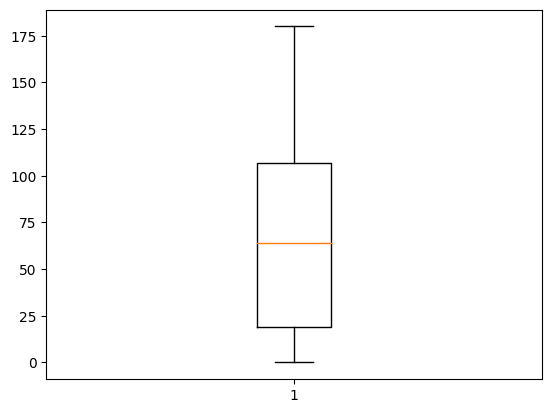

In [151]:
# Boxplot après suppression
plt.boxplot(df_traffic['CarCount'])
plt.show()

#### 4 : La variable du nombre de bus (`BusCount`): 


In [152]:
# Nombre de valeurs manquantes

print(df_traffic['BusCount'].isnull().sum())




437


In [153]:
# Remplacement par zéro
df_traffic['BusCount'].fillna(0, inplace=True)

#### 5 : La variable `Traffic Situation'


In [154]:
# Vérification des valeurs manquantes
print(df_traffic['Traffic Situation'].isnull().sum())



14


**Commentaire** : cette variable contient 14 valeurs manquantes


In [155]:
# Suppression des lignes avec valeurs manquantes
df_traffic.dropna(subset=['Traffic Situation'], inplace=True)
print(df_traffic.shape[0])

2960


**Commentaire** : Il reste 2960 observations ( 2976 - ( 2+14))

#### 6 : Normalisation des 4 variables de comptage (`CarCount', 'BikeCount`, `BusCount`, `TruckCount`) et stockage dans le data frame aux noms (`CarCount_Normed', 'BikeCount_Normed`, `BusCount_Normed`, `TruckCount_Normed`) 

In [158]:
# Gestion de toutes les autres valeurs manquantes du df:
df_traffic.dropna(inplace=True)
from sklearn.preprocessing import MinMaxScaler

# Initialisation de l'objet de normalisation
scaler = MinMaxScaler()

# Sélection des colonnes à normaliser
columns_to_normalize = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

# Application de la normalisation sur les colonnes sélectionnées
df_traffic_normalized = scaler.fit_transform(df_traffic[columns_to_normalize])

# Conversion du résultat en DataFrame et ajout d'un suffixe aux noms des colonnes
df_traffic_normalized = pd.DataFrame(df_traffic_normalized, columns=[col + '_Normed' for col in columns_to_normalize])

# Concaténation des colonnes normalisées avec le DataFrame original
df_traffic = pd.concat([df_traffic, df_traffic_normalized], axis=1)

# Vérification des résultats
df_traffic.head()
df_traffic.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total,CarCount_Normed,BikeCount_Normed,BusCount_Normed,TruckCount_Normed,CarCount_Normed,BikeCount_Normed,BusCount_Normed,TruckCount_Normed
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2960.000000,2960.000000,2960.000000,2960.000000
mean,15.923234,68.496943,14.961617,15.231997,15.339334,114.033288,0.381120,0.149684,0.304851,0.383076,0.381188,0.149709,0.305216,0.383150
std,8.917881,45.868261,12.969405,14.320497,10.619480,60.162168,0.254787,0.129696,0.286078,0.265401,0.254683,0.129536,0.286225,0.265447
min,1.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000,0.105556,0.050000,0.020000,0.150000,0.105556,0.050000,0.020000,0.150000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,108.000000,0.355556,0.120000,0.240000,0.350000,0.355556,0.120000,0.240000,0.350000
75%,24.000000,107.000000,22.000000,25.000000,24.000000,164.000000,0.594444,0.220000,0.500000,0.600000,0.594444,0.220000,0.500000,0.581250
max,31.000000,180.000000,100.000000,50.000000,40.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 7 : La variable `Total` : 


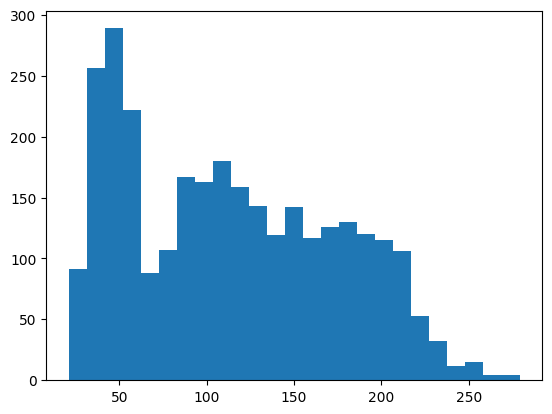

In [157]:
# Histogramme classique
plt.hist(df_traffic['Total'], bins=25)
plt.show()




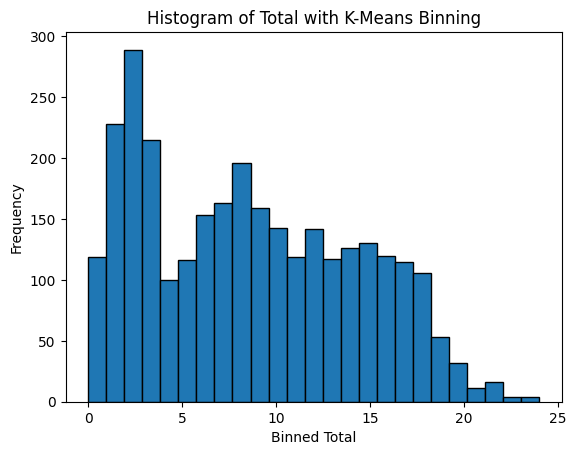

In [138]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer


# Remplacer les valeurs NaN par la médiane
df_traffic['Total'].fillna(df_traffic['Total'].median(), inplace=True)

# Initialisation de la discrétisation basée sur les k-means
kbins = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='kmeans')

# Application de la discrétisation sur la colonne 'Total'
df_traffic['Total_binned'] = kbins.fit_transform(df_traffic[['Total']])

# Affichage de l'histogramme des données discrétisées
plt.hist(df_traffic['Total_binned'], bins=25, edgecolor='black')
plt.xlabel('Binned Total')
plt.ylabel('Frequency')
plt.title('Histogram of Total with K-Means Binning')
plt.show()


#### 8 : Stockage en X et X_normed

In [139]:
X = df_traffic[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].values
X_normed = df_traffic[['CarCount_Normed', 'BikeCount_Normed', 'BusCount_Normed', 'TruckCount_Normed']].values


#### 9 : stockage de la situation de traffic après l'avoir encodée de façon numérique

In [140]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df_traffic['Traffic Situation'])


#### 10 : un premier modèle de machine learning


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Split en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [142]:
# instanciation , entrainement, et prediction avec le modèle
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)
y_pred_lda = model_lda.predict(X_test)

ValueError: Input X contains NaN.
LinearDiscriminantAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [143]:
# évaluation de la performance du modèle avec la métrique accuracy
accuracy = accuracy_score(y_test, y_pred_lda)
print()

ValueError: Found input variables with inconsistent numbers of samples: [893, 888]

#### 11 : Idem mais avec les variables normalisées ?

In [144]:
X_train_normed, X_test_normed, y_train, y_test = train_test_split(X_normed, y, test_size=0.3, random_state=42)
model_lda_normed = LinearDiscriminantAnalysis()
model_lda_normed.fit(X_train_normed, y_train)
y_pred_lda_normed = model_lda_normed.predict(X_test_normed)
print(accuracy_score(y_test, y_pred_lda_normed))

ValueError: Input X contains NaN.
LinearDiscriminantAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Commentaire** : avec les variables normalisées , le modèle prédit mieux les labels 

## Fake News Détection


#### 12 : Import dataset

In [38]:
news = pd.read_csv('./data/news.csv')
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#### 13 : Renomez les colonnes en Id, Title, Text, Label

In [39]:
# renommage
news.columns = ['id','Title', 'Text', 'Label']
news.head()

,id,Title,Text,Label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#### 14 : Vérification et transformtions

In [45]:
# Vérification des valeurs manquantes
print(news.isnull().sum())



id       0
Title    0
Text     0
Label    0
dtype: int64


In [ ]:
# Pas de valeurs manquantes

In [46]:
# Transformation en minuscules
news['Text_cleaned'] = news['Text'].str.lower()


In [47]:
news.head()

,id,Title,Text,Label,Text_cleaned
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"daniel greenfield, a shillman journalism fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,u.s. secretary of state john f. kerry said mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"— kaydee king (@kaydeeking) november 9, 2016 t..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,it's primary day in new york and front-runners...


#### 15 : traitements du langage naturel


In [ ]:
# tokeniser et afficher les 70 premiers token

In [48]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string


# Tokenisation
text = news.loc[21, 'Text_cleaned']
tokens = word_tokenize(text)
print("70 premiers tokens:", tokens[:70])







70 premiers tokens: ['november', '13', ',', '2016', 'by', '21wire', 'leave', 'a', 'comment', 'episode', '#', '160', 'of', 'sunday', 'wire', 'show', 'resumes', 'this', 'november', '13', ',', '2016', 'as', 'host', 'patrick', 'henningsen', 'brings', 'a', '3', 'hours', 'special', 'broadcast', 'of', 'live', 'power-packed', 'talk', 'radio', 'on', 'acr…', 'listen', 'live', 'on', 'this', 'page', 'at', 'the', 'following', 'scheduled', 'show', 'times', ':', 'sundays', '–', '5pm-8pm', 'uk', 'time', '|', '12pm-3pm', 'et', '(', 'us', ')', '|', '9am-12pm', 'pt', '(', 'us', ')', 'this', 'week']


In [49]:
# Enlever la ponctuation et les non-alphabétiques
tokens = [word for word in tokens if word.isalpha()]
print("70 premiers tokens (après nettoyage):", tokens[:70])


70 premiers tokens (après nettoyage): ['november', 'by', 'leave', 'a', 'comment', 'episode', 'of', 'sunday', 'wire', 'show', 'resumes', 'this', 'november', 'as', 'host', 'patrick', 'henningsen', 'brings', 'a', 'hours', 'special', 'broadcast', 'of', 'live', 'talk', 'radio', 'on', 'listen', 'live', 'on', 'this', 'page', 'at', 'the', 'following', 'scheduled', 'show', 'times', 'sundays', 'uk', 'time', 'et', 'us', 'pt', 'us', 'this', 'week', 's', 'edition', 'of', 'the', 'sunday', 'wire', 'is', 'on', 'the', 'road', 'broadcasting', 'live', 'from', 'the', 'valley', 'of', 'the', 'sun', 'this', 'week', 'host', 'patrick', 'henningsen']


In [50]:
# Enlever les stop words et les tokens d'un seul caractère
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
print("70 premiers tokens (après enlever stop words):", tokens[:70])

70 premiers tokens (après enlever stop words): ['november', 'leave', 'comment', 'episode', 'sunday', 'wire', 'show', 'resumes', 'november', 'host', 'patrick', 'henningsen', 'brings', 'hours', 'special', 'broadcast', 'live', 'talk', 'radio', 'listen', 'live', 'page', 'following', 'scheduled', 'show', 'times', 'sundays', 'uk', 'time', 'et', 'us', 'pt', 'us', 'week', 'edition', 'sunday', 'wire', 'road', 'broadcasting', 'live', 'valley', 'sun', 'week', 'host', 'patrick', 'henningsen', 'covers', 'week', 'top', 'stories', 'us', 'internationally', 'first', 'hour', 'conduct', 'incredible', 'us', 'election', 'produced', 'president', 'elect', 'donald', 'trump', 'aftermath', 'nation', 'divided', 'punctuated', 'numerous', 'street', 'protests']


In [51]:
# Lemmatisation
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
print("70 premiers tokens (après lemmatisation):", lemmatized[:70])

70 premiers tokens (après lemmatisation): ['november', 'leave', 'comment', 'episode', 'sunday', 'wire', 'show', 'resume', 'november', 'host', 'patrick', 'henningsen', 'brings', 'hour', 'special', 'broadcast', 'live', 'talk', 'radio', 'listen', 'live', 'page', 'following', 'scheduled', 'show', 'time', 'sunday', 'uk', 'time', 'et', 'u', 'pt', 'u', 'week', 'edition', 'sunday', 'wire', 'road', 'broadcasting', 'live', 'valley', 'sun', 'week', 'host', 'patrick', 'henningsen', 'cover', 'week', 'top', 'story', 'u', 'internationally', 'first', 'hour', 'conduct', 'incredible', 'u', 'election', 'produced', 'president', 'elect', 'donald', 'trump', 'aftermath', 'nation', 'divided', 'punctuated', 'numerous', 'street', 'protest']


**Commentaire ** :problème La lemmatisation a ramené le mot us à la lettre u




In [ ]:
# solution , réappliquer la supression des mots d'une lettre en acceptant de sacrifier le mot us 


#### 16 : Chaine de prétraitements appliquée à l'ensemble du corpus


In [52]:
def preprocess_text_with_lemmatizer(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)

def preprocess_text_without_lemmatizer(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return ' '.join(tokens)

news['Text_cleaned'] = news['Text'].apply(preprocess_text_without_lemmatizer)
news['Text_lemmatized'] = news['Text'].apply(preprocess_text_with_lemmatizer)


In [53]:
news.head()

,id,Title,Text,Label,Text_cleaned,Text_lemmatized
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield shillman journalism fellow f...,daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...,google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,secretary state john kerry said monday stop pa...,secretary state john kerry said monday stop pa...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king kaydeeking november lesson tonight...,kaydee king kaydeeking november lesson tonight...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,primary day new york hillary clinton donald tr...,primary day new york hillary clinton donald tr...


#### 17 : Matrice documents * termes avec la fréquence TF-IDF 

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# transformer en une liste de textes la colonne de textes
X = news['Text_lemmatized'].tolist()

vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(X)
print("Nombre de termes dans le vocabulaire:", len(vectorizer.get_feature_names_out()))
print("Dimensions de la matrice X:", X_transformed.shape)


Nombre de termes dans le vocabulaire: 55072
Dimensions de la matrice X: (6335, 55072)


#### 18 :  encodage en en numérique des labels de chacune des nouvelles.

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_labellised = encoder.fit_transform(news['Label'])


In [64]:
y_labellised[2]

1

#### 19 : Split en Train Test (avec une répartition 70%-30%). 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_labellised, test_size=0.3, random_state=42)

#### 20 : Régression logisitique sur l'échantillon d'apprentissage.

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print("Taux de succès (accuracy) :", accuracy_score(y_test, y_pred))


Taux de succès (accuracy) : 0.9100473435034192


#### 22 : recall score des labels

In [65]:
from sklearn.metrics import recall_score

# Calculez le rappel pour chaque classe

recall_fake = recall_score(y_test, y_pred, pos_label=0)
recall_real = recall_score(y_test, y_pred, pos_label=1)

print("Rappel pour les fake news:", recall_fake)
print("Rappel pour les vraies nouvelles:", recall_real)


Rappel pour les fake news: 0.9421487603305785
Rappel pour les vraies nouvelles: 0.8767416934619507


In [66]:
# Obtenir le nombre de variables du modèle
nombre_de_termes = len(vectorizer.get_feature_names_out())
print("Nombre de termes dans le vocabulaire:", nombre_de_termes)

Nombre de termes dans le vocabulaire: 55072


**Réponses** : effectivement le modèle reconnait mieux les fake news.
 Le nombre de variables utilisées par le modèle correspond au nombre de termes dans le vocabulaire TF-IDF. Ces termes sont les variables du modèle.
Rappel : il y a eu projection du texte sous forme de vecteur dans un espace dont la dimension est égale au nombre de mots uniques dans le corpus (le vocabulaire). Les coordonnées de chaque vecteur sont les poids TF-IDF de chaque mot dans le document ****

#### 23 : Réduction d'espace

Construire un modèle en retenant 1000, 5000, 10000 et 30000 variables.

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.feature_selection import SelectKBest, f_classif


for k in [1000, 5000, 10000, 30000]:
    # Sélectionner les K meilleures caractéristiques
    selector = SelectKBest(f_classif, k=k)
    X_train_kbest = selector.fit_transform(X_train, y_train)
    X_test_kbest = selector.transform(X_test)

    # Créer et entraîner le modèle de régression logistique
    model = LogisticRegression()
    model.fit(X_train_kbest, y_train)

    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_kbest)

    # Calculer le rappel pour les fake news (supposons que 'fake' est encodé par 0)
    recall = recall_score(y_test, y_pred, pos_label=0)
    print(f"Rappel avec {k} caractéristiques: {recall}")



Rappel avec 1000 caractéristiques: 0.9307851239669421
Rappel avec 5000 caractéristiques: 0.9400826446280992
Rappel avec 10000 caractéristiques: 0.9390495867768595
Rappel avec 30000 caractéristiques: 0.9380165289256198


**Conclusion** : nous avons les meilleurs résultats avec une séléction de 5000 mots dans le vocabulaire , 5000 semble être un bon nombre de variables significatives dans la prédiction de la véracité de la news....